In [51]:
from pylab import *
import numpy as np

# Homework 6: Angular Momentum

## Part I
The centrifugal radius: $R_c = \frac{j^2}{GM_*}$ tells us how angular momentum determines the radius at which material is deposited at during infall into disk formation. 
If we assume angular momentum conservation from the envelope down to the disk scales, we know that over time each infalling layer, i,  at a radius of $r_i$ has specific angular momentum $j_i = r_i^2 \Omega_i$.

### part a
In the TSC model, for $\dot{M}_{in} = \frac{m_0 c_s^3}{G}$, each layer falls from a radius $r_i = (m_0/2) c_s t$ where $m_0 = 0.975$, a dimensionless constant and $c_s$ is the isothermal sound speed. 
For this model, derive $M_{*}(t)$ and $R_c(t)$. 

### part b
The break-up angular velocity of a rotating body is defined as where the gravitational energy is equal to the rotational energy. Above this value, the body would be torn apart by rotation as gravity would not be able to hold it together. 
Derive the break-up velocity for a protostellar core and calculate it in radians per second for a 1 solar mass core of about 0.1 pc in size. 

### part c
Plot $Rc(t)$ for $c_s = 0.2 \ \mathrm{km \ s^{-1}}$ and $\Omega_i = 2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ for t between 0 and 500 kyr. How fast is the input angular velocity compared to break up? What is the resulting disk size at t=500 kyr? How much mass would have infallen in that time span?

### part d
So far we have only been assuming that $\Omega_i$ is constant solid body rotation, but in principle $\Omega_i(r)$ could be a function of radius within the protostellar core. For instance, if we take the scaling of an turbulent sub-sonic eddy as in Larson's law, $v_{rot} \propto R^{-0.33}$. Solve for the corresponding $\Omega_i(r)$ and $Rc(t)$ with this more generalized behavior. 

### part e
Let's say that the angular velocity has the form: $\Omega_s \left( \frac{r}{r_s}\right)^{p}$. Where $\Omega_s =  2 \times 10^{-14} \mathrm{rad \ s^{-1}}$ at $r_s = 0.05 \ \mathrm{pc}$ (to match measured values from observations at the same scale). Plot $Rc(t)$ for both the  uniform $\Omega_i$ and the turbulent $\Omega_i$ case on the same plot, assuming the power-law form above. When do both models have the same $R_c$? 
Based on what you know about mass deposition during disk formation, qualitatively, what would be the difference betweeen the disks formed under these two assumptions?

In [52]:
#Part A Answer: 
m0=0.975
G=6.67e-8
cs=0.2 #in km/s
kmtocm=1e5
ohm=2e-14 #rad/s
yrtos=3.15e7
pctocm = 3.086e18
Msun = 1.99e33

def Mstar(t,c):
    c=c*kmtocm
    M=np.zeros(len(t))
    for i in range(len(t)):
        M[i]=m0*c**3*t[i]*yrtos/G
    return M

def Rcent(t,c,ohm):
    c=c*kmtocm
    Rc=np.zeros(len(t))
    for i in range(len(t)):
        Rc[i]=(m0**3)/16 * (c**2) * (t[i]*yrtos)**3 * ohm**2
    return Rc

In [53]:
#Part B answer:

def OhmCrit(M,R):
    ohmc=np.sqrt(3 * G * M/R**3)
    return ohmc

ohmcritical=OhmCrit(Msun,0.1*pctocm)
print(ohmcritical)

1.164008629282341e-13


Text(0, 0.5, 'R [pc]')

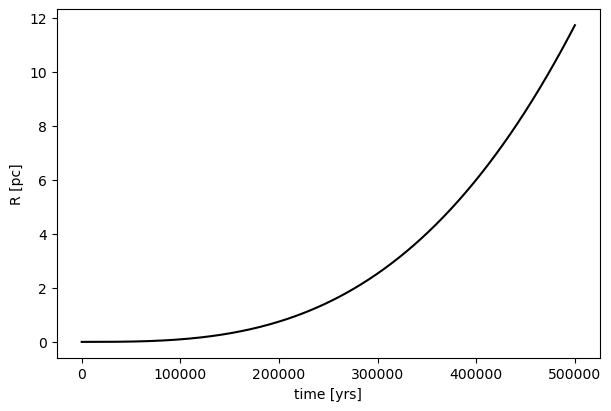

In [54]:
#Part C answer:
n=200
t=np.linspace(0,5e5,n)

M=Mstar(t,cs)
R=Rcent(t,cs,ohm)

f,ax = subplots(1,constrained_layout=True, dpi=100)
ax.plot(t,R/pctocm,color='k')

ax.set_xlabel('time [yrs]')
ax.set_ylabel('R [pc]')

/Users/arothermich/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Text(0, 0.5, 'log($\\Omega/\\Omega_c$)')

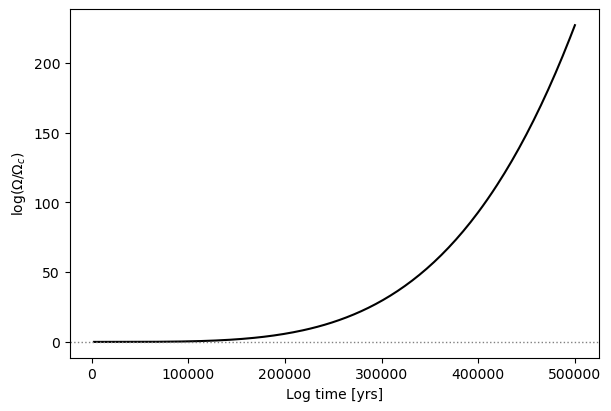

In [55]:
ohmc=OhmCrit(M,R)
f,ax = subplots(1,constrained_layout=True, dpi=100)
ax.plot(t,ohm/ohmc,color='k')
ax.axhline(ohm, ls='dotted',lw=1, color='gray')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('Log time [yrs]')
ax.set_ylabel(r'log($\Omega/\Omega_c$)')

Text(0, 0.5, 'M (Msun)')

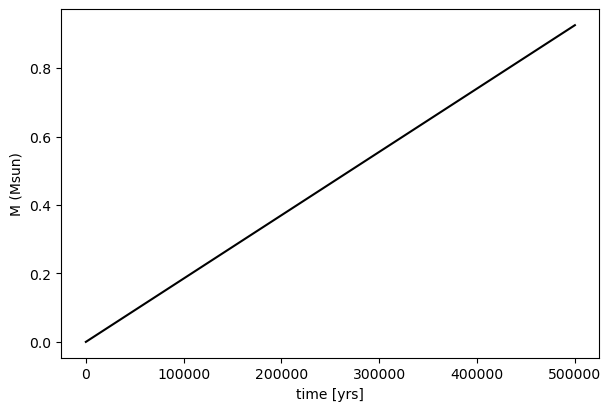

In [56]:
f,ax = subplots(1,constrained_layout=True, dpi=100)
ax.plot(t,M/Msun,color='k')

ax.set_xlabel('time [yrs]')
ax.set_ylabel('M (Msun)')

Text(0, 0.5, 'R [pc]')

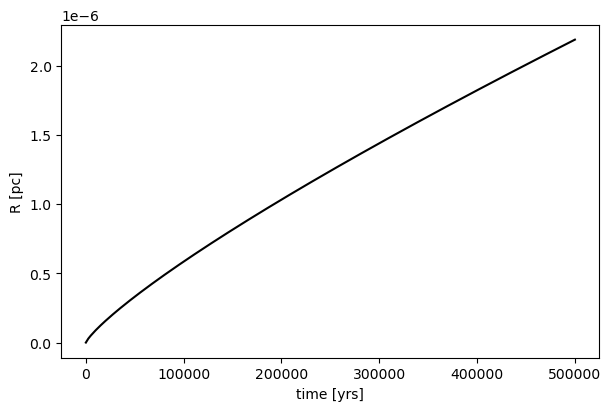

In [58]:
# Part D answer: 

def omega_r(R):
    omega_r=R**(-1.33)
    return omega_r

def Rc_variableOhm(t,c):
    Rc_var=np.zeros(len(t))
    c=c*kmtocm
    for i in range(len(t)):
        Rc_var[i]=((m0**3)/16 * (c**2) * (t[i]*yrtos)**3)**(1/3.66)
    return Rc_var

Rc_larson=Rc_variableOhm(t,cs)
f,ax = subplots(1,constrained_layout=True, dpi=100)
ax.plot(t,Rc_larson/pctocm,color='k')

ax.set_xlabel('time [yrs]')
ax.set_ylabel('R [pc]')


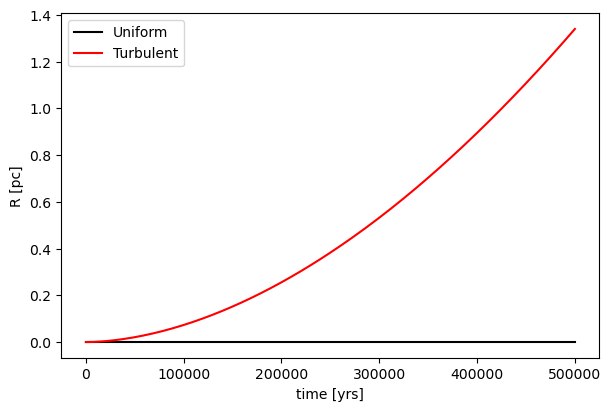

In [60]:
# Part E answer 
ohm_s=2e-14
r_s=0.05 #pc

def turbOhmRC(t,c):
    Rc_turb=np.zeros(len(t))
    c=c*kmtocm
    for i in range(len(t)):
        Rc_turb[i]=((m0**3)/16 * (c**2) * (t[i]*yrtos)**3 * ohm_s**2 * (r_s*pctocm)**(0.66))**(1/1.66)
    return Rc_turb

turb_RC=turbOhmRC(t,cs)

Rc_larson=Rc_variableOhm(t,cs)
f,ax = subplots(1,constrained_layout=True, dpi=100)
ax.plot(t,Rc_larson/pctocm,color='k',label="Uniform")
ax.plot(t,turb_RC/pctocm,color='r',label="Turbulent")

ax.set_xlabel('time [yrs]')
ax.set_ylabel('R [pc]')
ax.legend()

## Part II: *Menu* 

For additional menu points this week, use the $Rc(t)$ you calculated above, and the $\dot{\Sigma}(r,t)$ profile from Cassen+Moosman 1981 to numerically integrate through time to calculate $\Sigma(t)$ for the two cases in part d. (This gives us a very rough understanding of the resulting disk as it does not take into account angular momentum transport during this phase). Plot the resulting surface density profiles and comment on their differences. 

*Hint*: You may want your timesteps to be logarithmically spaced